### Similar to snRNA-seq, we will manually examine each individual cell type and perform annotation refinement

1. Load in the gene imputation counts for each cell-type subsetted adata object. The goal will be to see if we can perform better cluster annotation based on marker gene imputation for clusters that were assigned to multiple cell types

In [1]:
import scanpy as sc 
import pandas as pd
import numpy as np
import snapatac2 as snap
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import os
import gc

Identify the cell type adata objects from the first round of annotation. The issue with these is that they are based on the leiden clusters and label transferred from RNA modality. In some cases, we may be able to further improve the cell type annotation through subclustering of the cell type objects, as performed in `05B_subset_to_individual_cell_types.py`.

In [2]:
adata_file_paths = os.listdir("pre_indiv_cell_type_adata/")
adata_file_paths

['Cardiomyocyte_gene_imputed.h5ad',
 'Neuronal-Epicardial_gene_imputed.h5ad',
 'Myeloid_gene_imputed.h5ad',
 'Adipocyte_gene_imputed.h5ad',
 'Endothelial_gene_imputed.h5ad',
 'Fibroblast_gene_imputed.h5ad',
 'Pericyte-vSMC_gene_imputed.h5ad',
 'Lymphoid-Mast_gene_imputed.h5ad']

### Adipocyte

In [3]:
%%time
Adipo_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Adipocyte_gene_imputed.h5ad")
Adipo_gene_matrix.shape

CPU times: user 160 ms, sys: 2.86 s, total: 3.02 s
Wall time: 3.79 s


(5542, 59376)

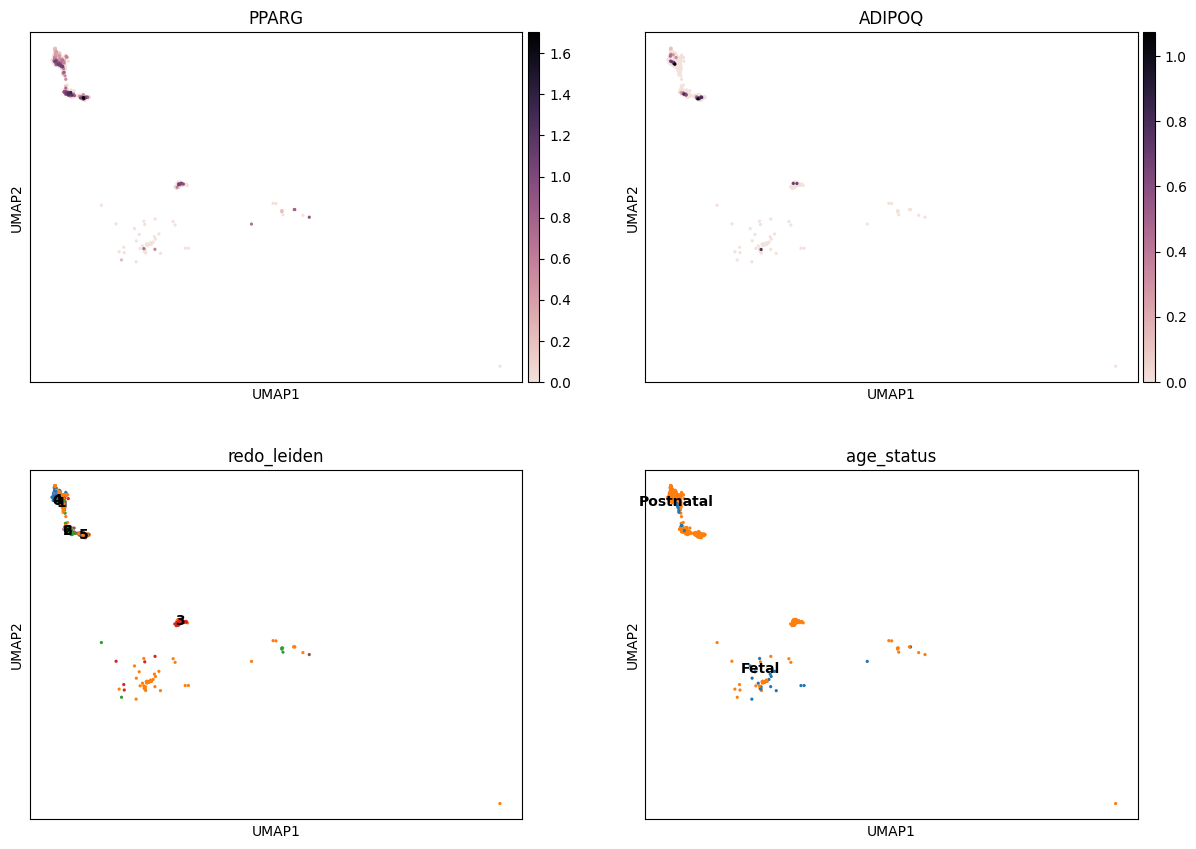

CPU times: user 574 ms, sys: 229 ms, total: 803 ms
Wall time: 628 ms


In [4]:
%%time
sc.pl.umap(Adipo_gene_matrix, color = ["PPARG", "ADIPOQ", "redo_leiden", "age_status"], ncols = 2, legend_loc = "on data",
          cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

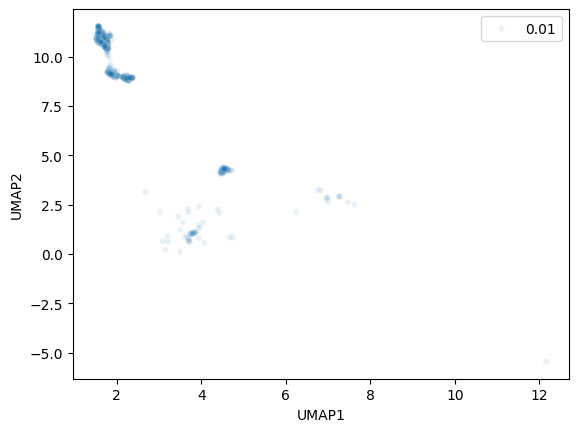

In [5]:
sns.scatterplot(data = Adipo_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

Number of cells filtered out : 566
CPU times: user 926 ms, sys: 3.55 s, total: 4.47 s
Wall time: 4.45 s


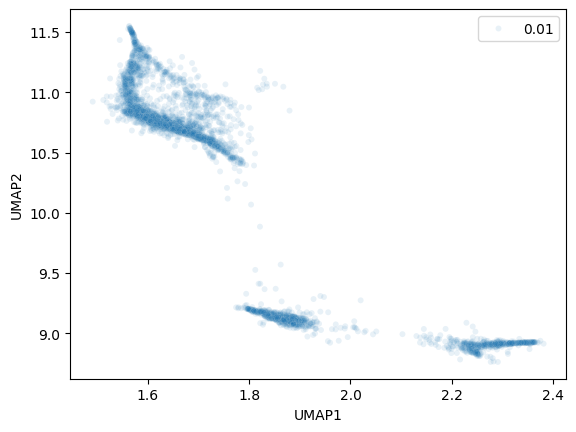

In [6]:
%%time
filt_Adipo_gene_matrix = ( Adipo_gene_matrix[(Adipo_gene_matrix.obs.UMAP2 > 7.5)]).copy()
sns.scatterplot(data = filt_Adipo_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered out : {Adipo_gene_matrix.shape[0] - filt_Adipo_gene_matrix.shape[0]}")

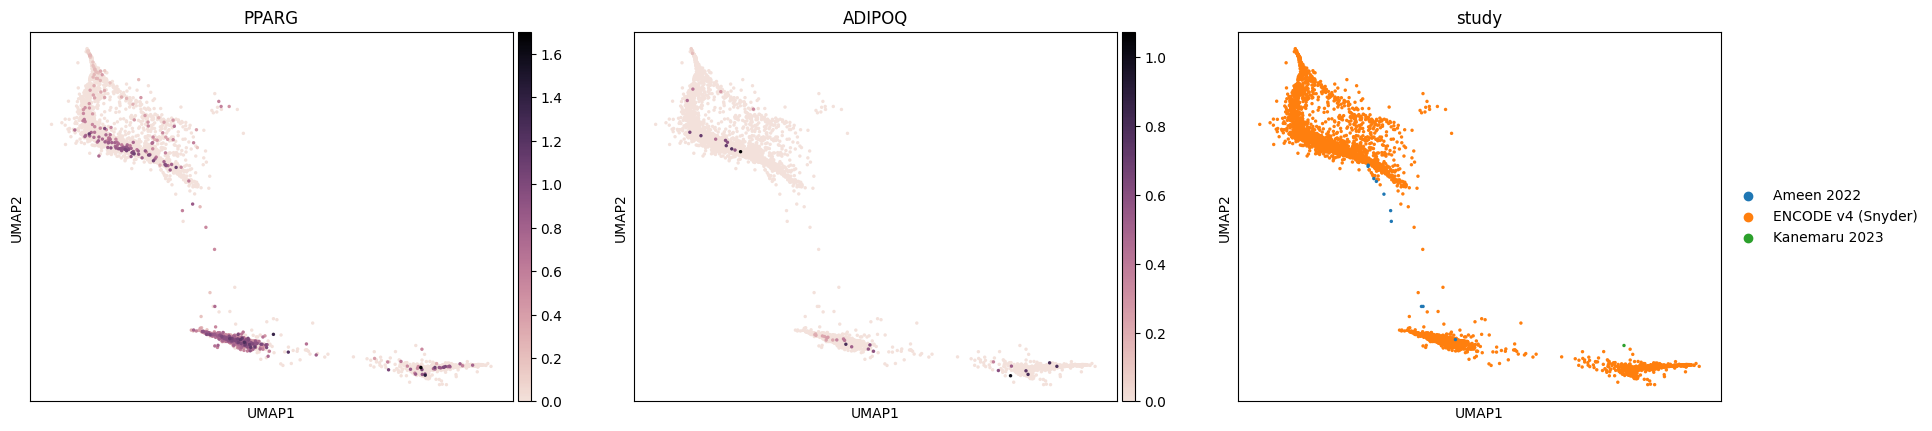

In [7]:
sc.pl.umap(filt_Adipo_gene_matrix, color = ["PPARG", "ADIPOQ", "study"], cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

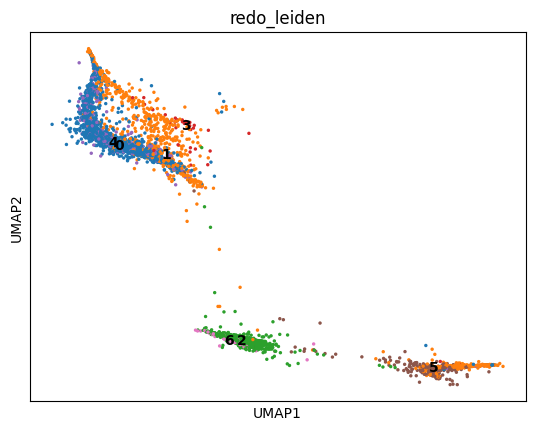

In [8]:
sc.pl.umap(filt_Adipo_gene_matrix, color = ["redo_leiden"], legend_loc = "on data",
           cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

In [9]:
# further filter to the cluster with high PPARG imputed expression
further_filt_Adipo_gene_matrix = filt_Adipo_gene_matrix[(filt_Adipo_gene_matrix.obs["redo_leiden"].isin(["2", "6"]))].copy()

In [10]:
filt_Adipo_metadata = further_filt_Adipo_gene_matrix.obs
filt_Adipo_metadata['cell_type'] = "Adipocyte"

In [11]:
del filt_Adipo_gene_matrix
gc.collect()

29124

### Cardiomyocyte

In [12]:
%%time
CM_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Cardiomyocyte_gene_imputed.h5ad")
CM_gene_matrix.shape

CPU times: user 2.87 s, sys: 2min 48s, total: 2min 51s
Wall time: 4min 23s


(292857, 60499)

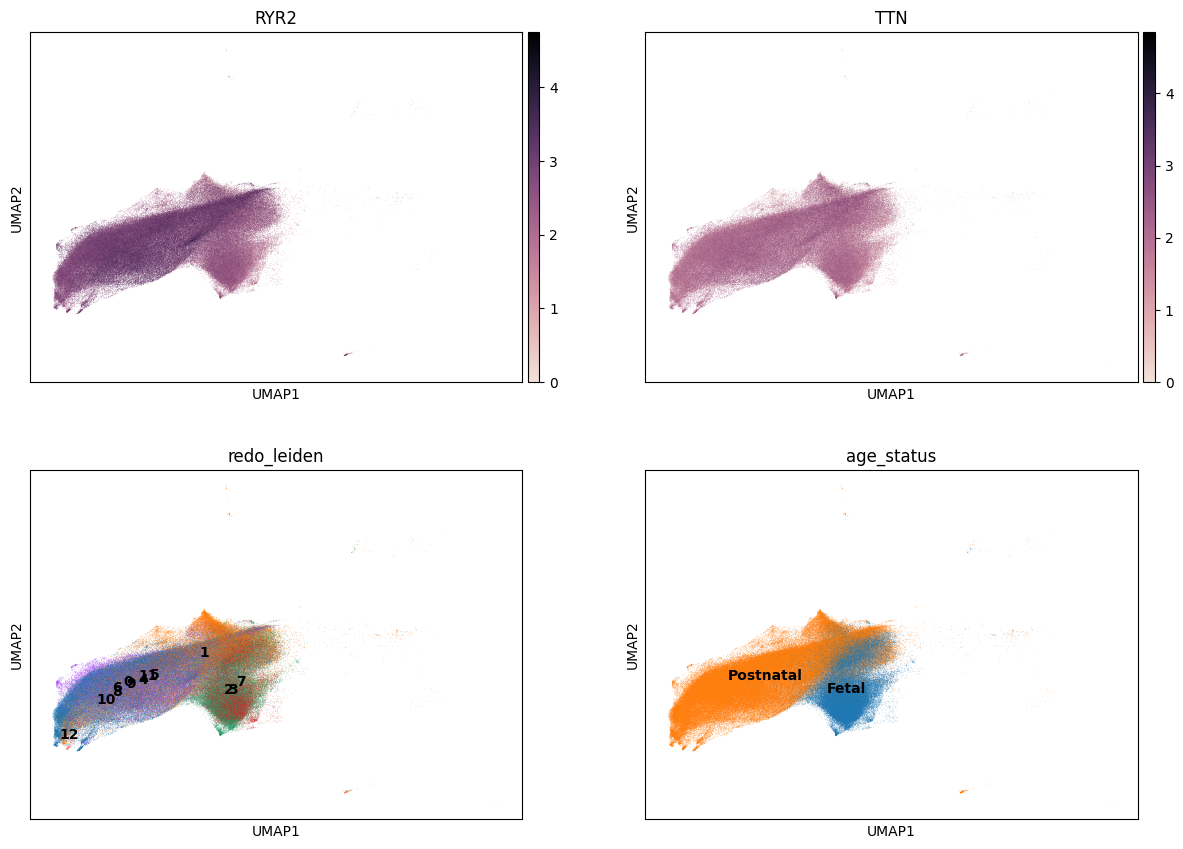

CPU times: user 9.78 s, sys: 323 ms, total: 10.1 s
Wall time: 9.92 s


In [13]:
%%time
sc.pl.umap(CM_gene_matrix, color = ["RYR2", "TTN", "redo_leiden", "age_status"], ncols = 2, legend_loc = "on data",
          cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

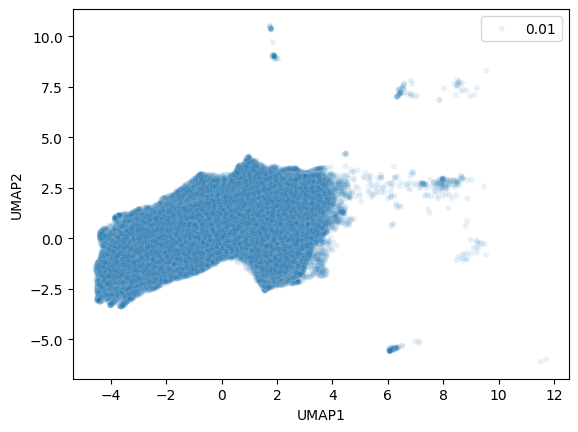

In [14]:
sns.scatterplot(data = CM_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

Number of cells filtered out : 1459


/home/william/anaconda3/envs/r-kernel/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


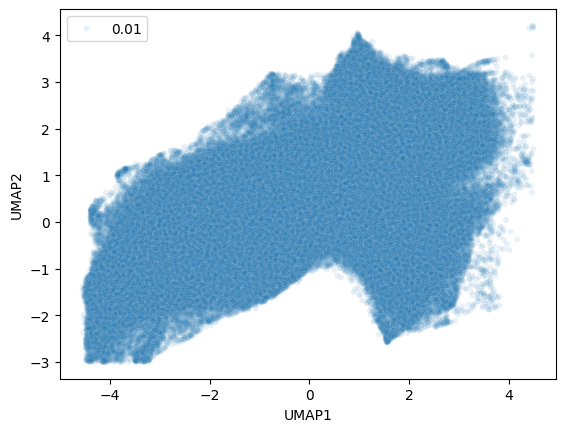

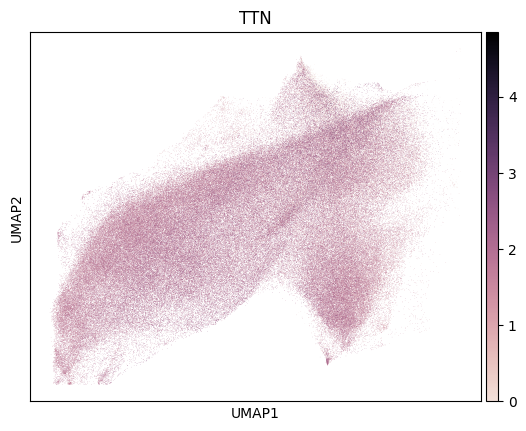

CPU times: user 1min 54s, sys: 46min 15s, total: 48min 9s
Wall time: 50min 2s


In [15]:
%%time
filt_CM_gene_matrix = ( CM_gene_matrix[(CM_gene_matrix.obs.UMAP1 < 4.5) &
                           (CM_gene_matrix.obs.UMAP2 > -3) & 
                           (CM_gene_matrix.obs.UMAP2 < 5)] ).copy()
sns.scatterplot(data = filt_CM_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered out : {CM_gene_matrix.shape[0] - filt_CM_gene_matrix.shape[0]}")
sc.pl.umap(filt_CM_gene_matrix, color = ["TTN"], cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

In [16]:
filt_CM_metadata = filt_CM_gene_matrix.obs
filt_CM_metadata['cell_type'] = "Cardiomyocyte"

In [17]:
del filt_CM_gene_matrix
gc.collect()

16527

### Endothelial, Endocardial, LEC 

In [18]:
%%time
Endothelial_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Endothelial_gene_imputed.h5ad")
Endothelial_gene_matrix.shape

CPU times: user 2.17 s, sys: 2min, total: 2min 2s
Wall time: 3min 31s


(118863, 60432)

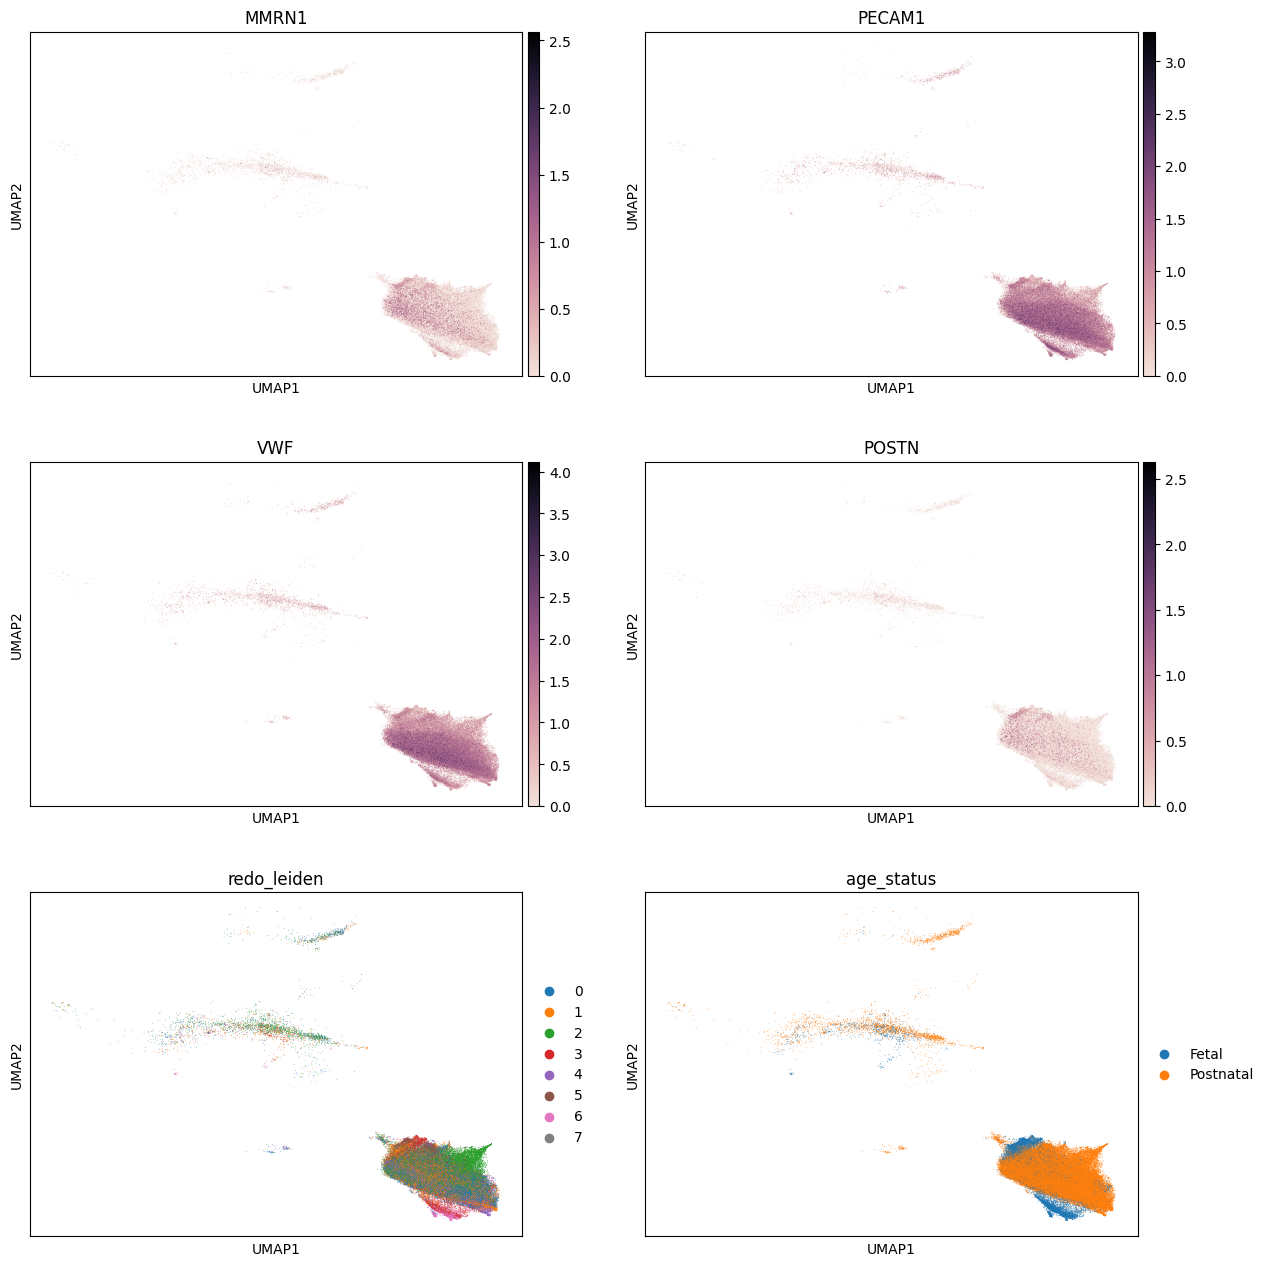

In [19]:
sc.pl.umap(Endothelial_gene_matrix, color = ["MMRN1", # LEC marker
                                                  "PECAM1", "VWF", # Endothelial markers
                                                 "POSTN", # Endocardial marker 
                                                 "redo_leiden", 
                                             "age_status"], ncols = 2, cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

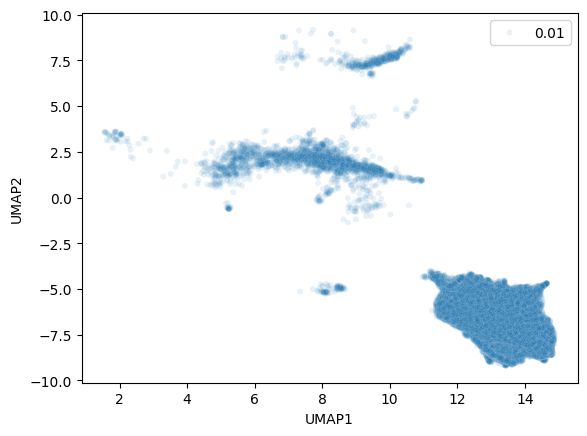

In [20]:
sns.scatterplot(data = Endothelial_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

Number of cells filtered: 3593
CPU times: user 29.9 s, sys: 3min 9s, total: 3min 39s
Wall time: 3min 42s


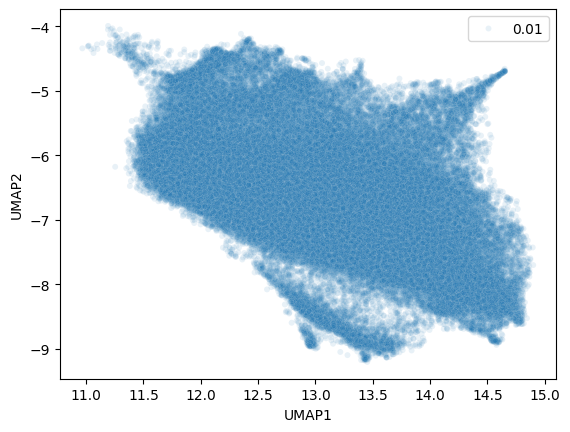

In [21]:
%%time
filt_Endothelial_gene_matrix = ( Endothelial_gene_matrix[(Endothelial_gene_matrix.obs.UMAP1 > 10.5) &
                         (Endothelial_gene_matrix.obs.UMAP2 < -2.5)] ).copy()
sns.scatterplot(data = filt_Endothelial_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered: {Endothelial_gene_matrix.shape[0] - filt_Endothelial_gene_matrix.shape[0]}")

#### Reperform visualization of leiden clusters 

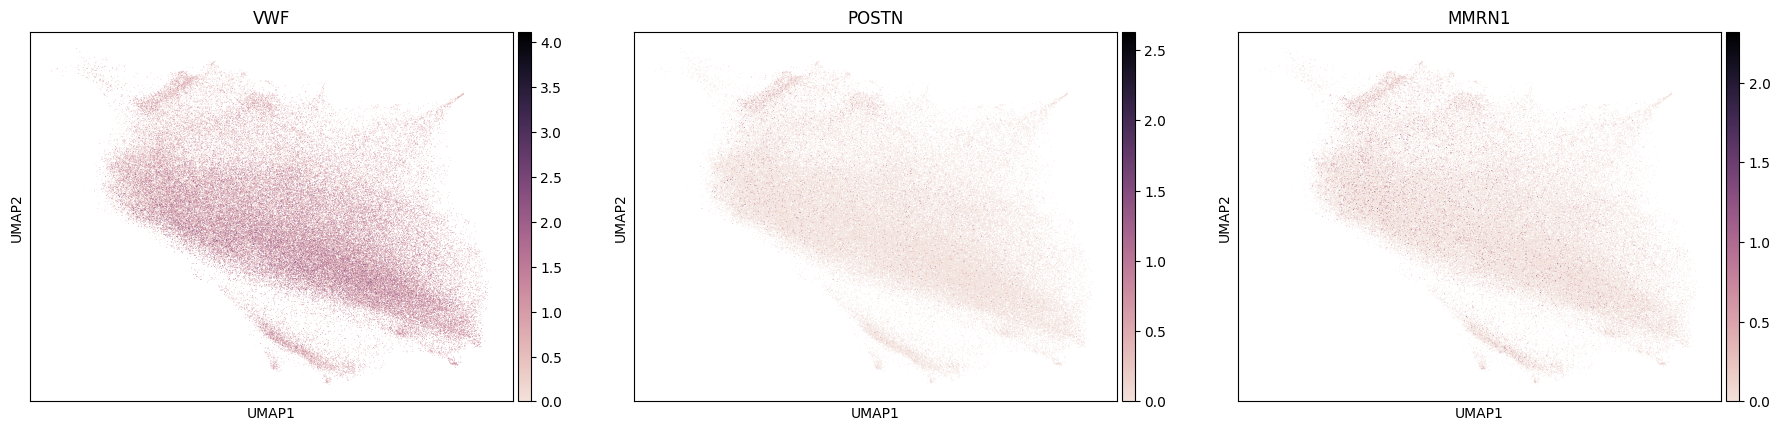

In [22]:
sc.pl.umap(filt_Endothelial_gene_matrix, color = ["VWF", "POSTN", "MMRN1"], 
           cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

In [23]:
filt_Endothelial_metadata = filt_Endothelial_gene_matrix.obs
filt_Endothelial_metadata['cell_type'] = "Endothelial"

In [24]:
del filt_Endothelial_gene_matrix
gc.collect()

40967

### Epicardial/Neuronal

In [25]:
Neuro_Epicardial_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Neuronal-Epicardial_gene_imputed.h5ad")
Neuro_Epicardial_gene_matrix.shape

(10283, 60231)

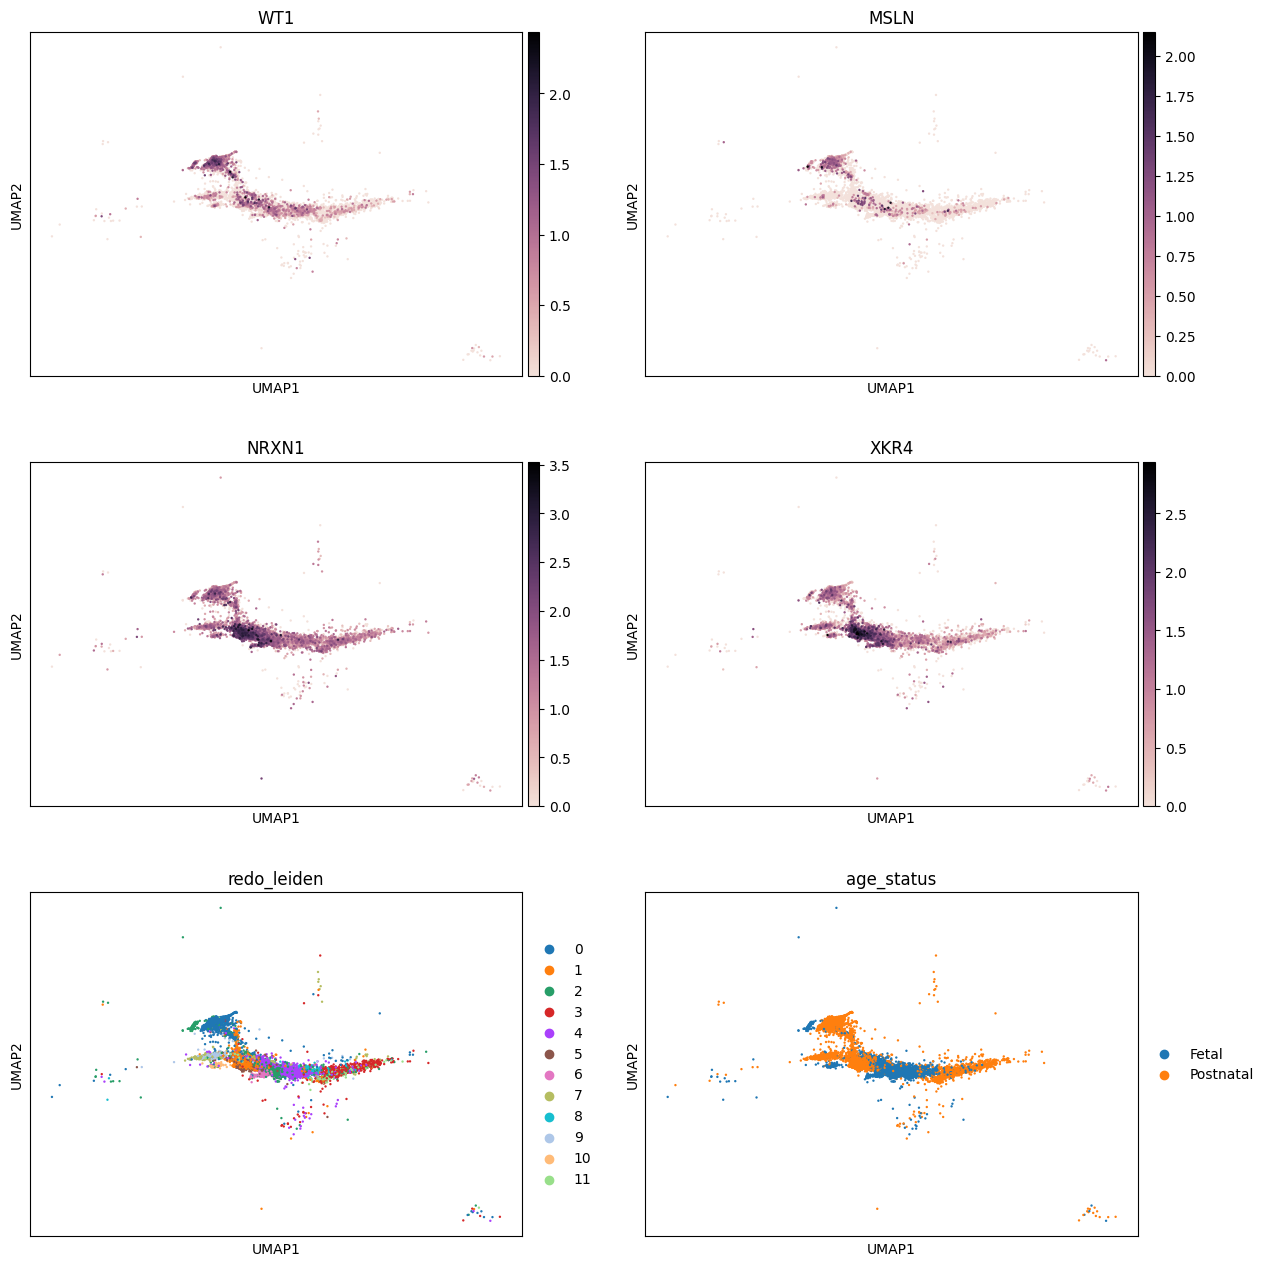

In [26]:
sc.pl.umap(Neuro_Epicardial_gene_matrix, color = ["WT1", "MSLN",
                                                  "NRXN1", "XKR4",
                                                 "redo_leiden", "age_status"], 
           ncols = 2, cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

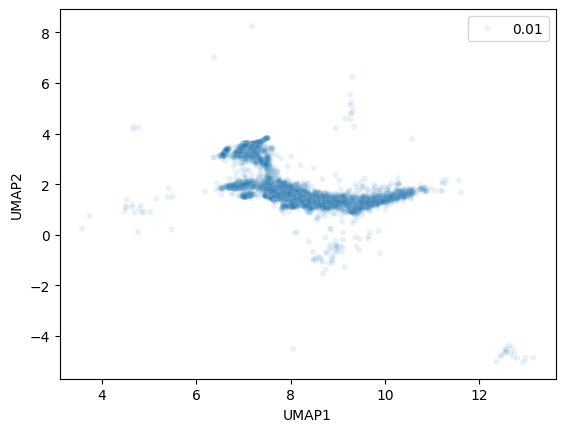

In [27]:
sns.scatterplot(data = Neuro_Epicardial_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

#### The top cluster are the Epicardial cells based on their imputed gene expression, while the bottom cluster are the Neuronal cells

Number of cells filtered: 96


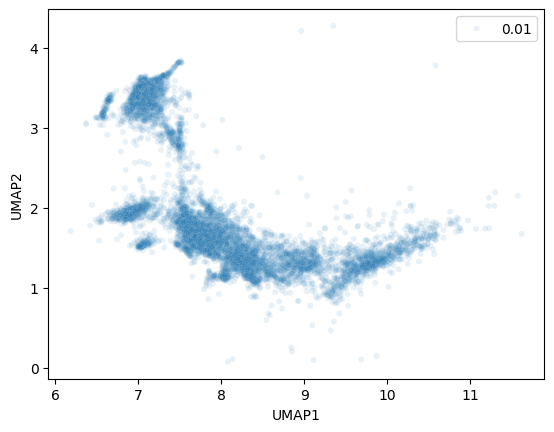

In [28]:
filt_Neuro_Epicardial_gene_matrix = ( Neuro_Epicardial_gene_matrix[(Neuro_Epicardial_gene_matrix.obs.UMAP1 > 6) &
                                     (Neuro_Epicardial_gene_matrix.obs.UMAP1 < 12) & 
                                     (Neuro_Epicardial_gene_matrix.obs.UMAP2 < 4.5) & 
                                     (Neuro_Epicardial_gene_matrix.obs.UMAP2 > 0)] ).copy()

sns.scatterplot(data = filt_Neuro_Epicardial_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered: {Neuro_Epicardial_gene_matrix.shape[0] - filt_Neuro_Epicardial_gene_matrix.shape[0]}")

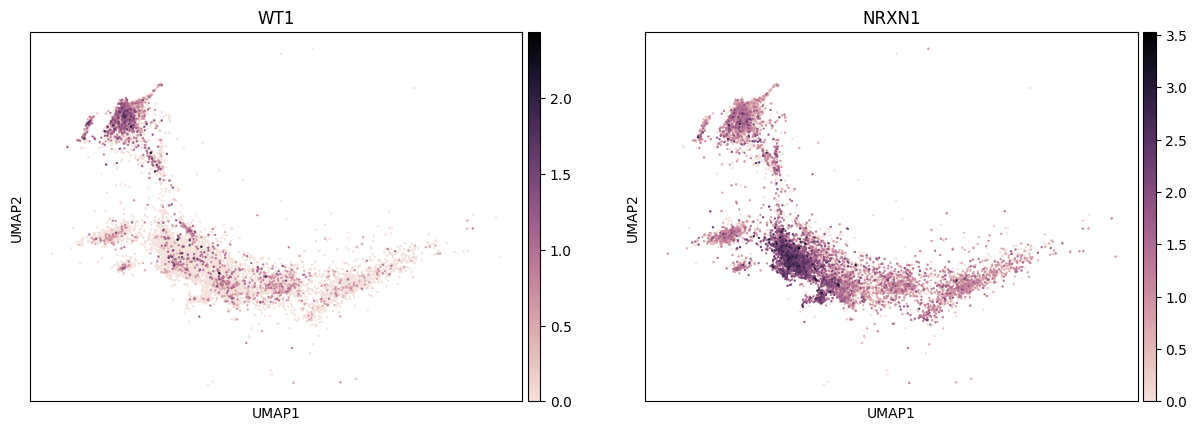

In [29]:
sc.pl.umap(filt_Neuro_Epicardial_gene_matrix, color = ["WT1", "NRXN1"], 
           cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True), ncols = 2)

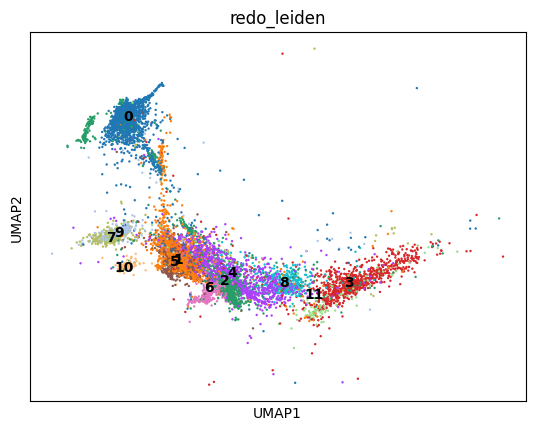

In [30]:
sc.pl.umap(filt_Neuro_Epicardial_gene_matrix, color = ["redo_leiden"], legend_loc = "on data",
           cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True), ncols = 2)

Leiden clusters 0 are Epicaridal cells, while clusters 1,5, and 6 are neuronal cells 

In [31]:
%%time
filt_Epicardial_gene_matrix = filt_Neuro_Epicardial_gene_matrix[filt_Neuro_Epicardial_gene_matrix.obs['redo_leiden'].isin(["0"])].copy()
filt_Neuronal_gene_matrix = filt_Neuro_Epicardial_gene_matrix[filt_Neuro_Epicardial_gene_matrix.obs['redo_leiden'].isin(["1", "5", "6"])].copy()

print(filt_Epicardial_gene_matrix.shape[0])
print(filt_Neuronal_gene_matrix.shape[0])

2299
3365
CPU times: user 1.48 s, sys: 2.44 s, total: 3.92 s
Wall time: 3.89 s


In [32]:
filt_Epicardial_metadata = filt_Epicardial_gene_matrix.obs
filt_Epicardial_metadata['cell_type'] = "Epicardial"

filt_Neuronal_metadata = filt_Neuronal_gene_matrix.obs
filt_Neuronal_metadata['cell_type'] = "Neuronal"

In [33]:
del filt_Neuro_Epicardial_gene_matrix
del filt_Neuronal_gene_matrix
del filt_Epicardial_gene_matrix
gc.collect()

36960

### Fibroblast

In [34]:
%%time
Fibroblast_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Fibroblast_gene_imputed.h5ad")
Fibroblast_gene_matrix

CPU times: user 1.49 s, sys: 1min 31s, total: 1min 33s
Wall time: 1min 52s


AnnData object with n_obs × n_vars = 143848 × 60447
    obs: 'barcode', 'sample_id', 'leiden', 'donor_id', 'study', 'age_status', 'age', 'sex', 'region', 'disease_binary', 'technology', 'fragment_file', 'full_path', 'file', 'nfrag', 'tsse', 'cell_type', 'UMAP1', 'UMAP2', 'redo_leiden'
    var: 'n_counts'
    uns: 'log1p', 'neighbors', 'pca', 'redo_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

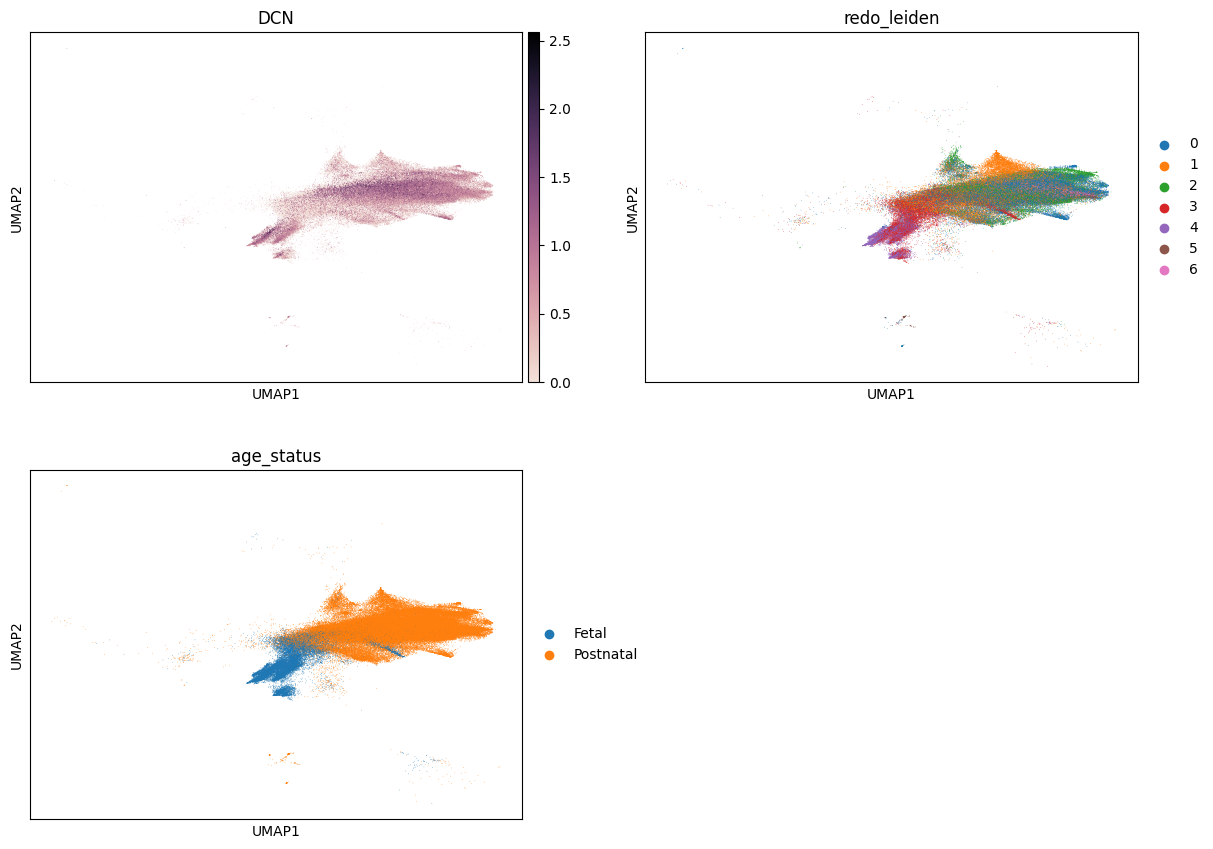

In [35]:
sc.pl.umap(Fibroblast_gene_matrix, color = ["DCN", "redo_leiden", "age_status"], 
           ncols = 2, cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

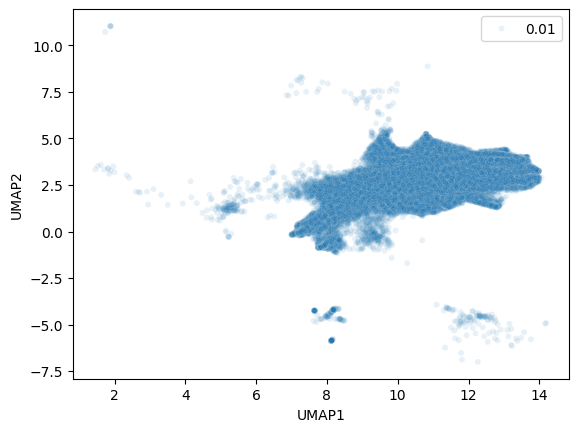

In [36]:
sns.scatterplot(data = Fibroblast_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

Number of cells filtered: 720
CPU times: user 37.6 s, sys: 9min 20s, total: 9min 58s
Wall time: 10min


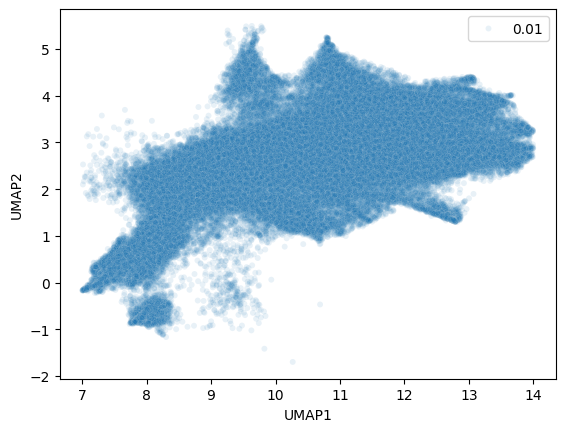

In [37]:
%%time
filt_Fibroblast_gene_matrix = ( Fibroblast_gene_matrix[(Fibroblast_gene_matrix.obs.UMAP1 > 7) &
                         (Fibroblast_gene_matrix.obs.UMAP1 < 14) &
                           (Fibroblast_gene_matrix.obs.UMAP2 < 5.5) & (Fibroblast_gene_matrix.obs.UMAP2 > -2.5)] ).copy()
sns.scatterplot(data = filt_Fibroblast_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered: {Fibroblast_gene_matrix.shape[0] - filt_Fibroblast_gene_matrix.shape[0]}")

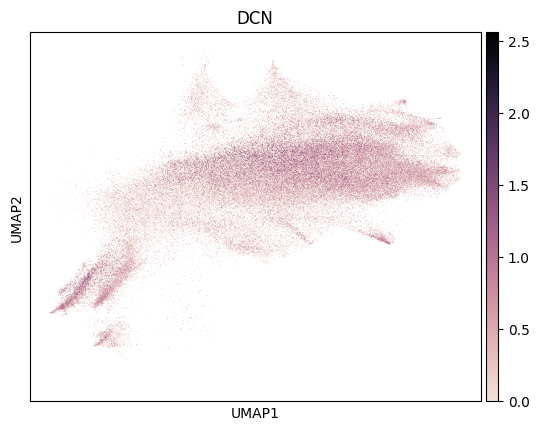

In [38]:
sc.pl.umap(filt_Fibroblast_gene_matrix, color = ["DCN"], cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

In [39]:
filt_Fibroblast_metadata = filt_Fibroblast_gene_matrix.obs
filt_Fibroblast_metadata['cell_type'] = "Fibroblast"

In [40]:
del filt_Fibroblast_gene_matrix
gc.collect()

17186

### Myeloid

In [41]:
%%time
Myeloid_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Myeloid_gene_imputed.h5ad")
Myeloid_gene_matrix

CPU times: user 635 ms, sys: 32.3 s, total: 32.9 s
Wall time: 36.8 s


AnnData object with n_obs × n_vars = 57271 × 60408
    obs: 'barcode', 'sample_id', 'leiden', 'donor_id', 'study', 'age_status', 'age', 'sex', 'region', 'disease_binary', 'technology', 'fragment_file', 'full_path', 'file', 'nfrag', 'tsse', 'cell_type', 'UMAP1', 'UMAP2', 'redo_leiden'
    var: 'n_counts'
    uns: 'log1p', 'neighbors', 'pca', 'redo_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

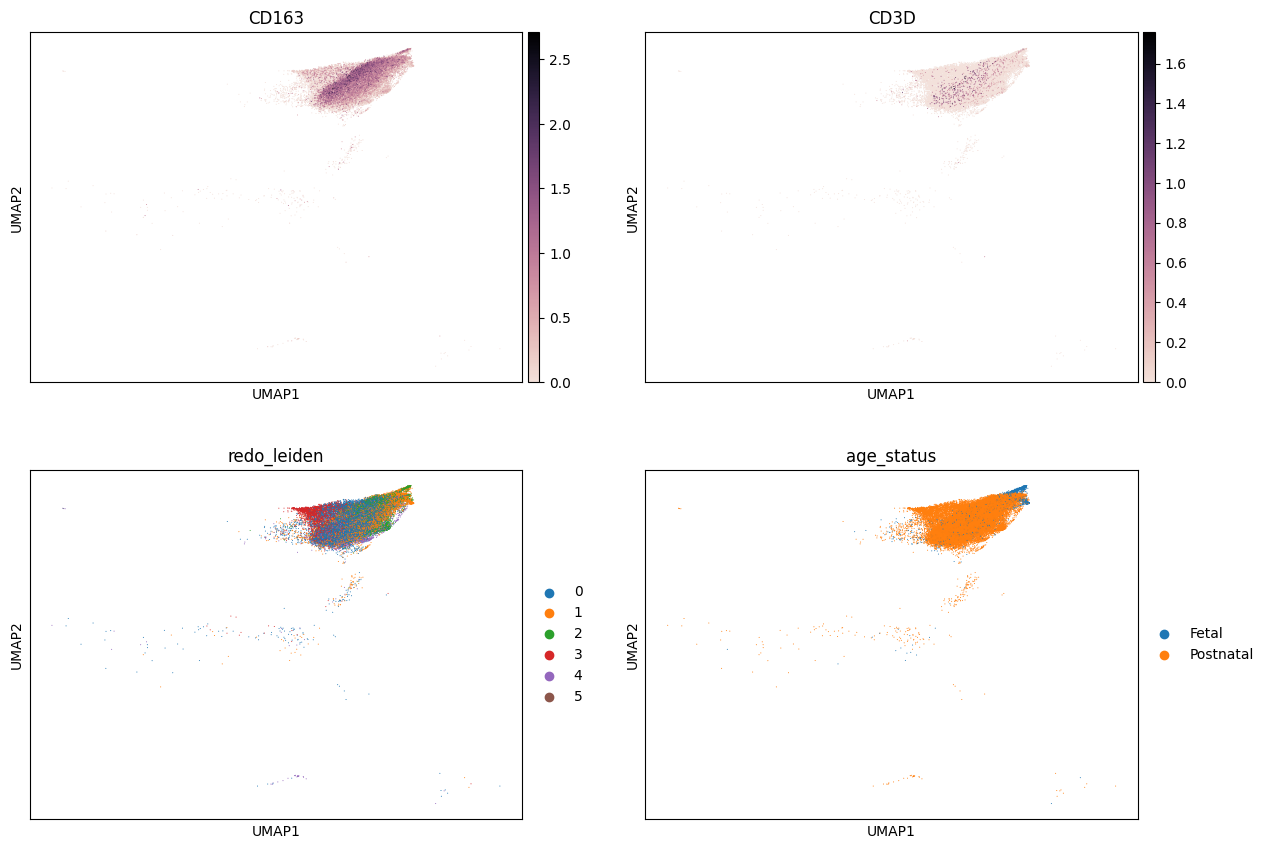

In [42]:
sc.pl.umap(Myeloid_gene_matrix, color = ["CD163", "CD3D", "redo_leiden", "age_status"], 
           ncols = 2, cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

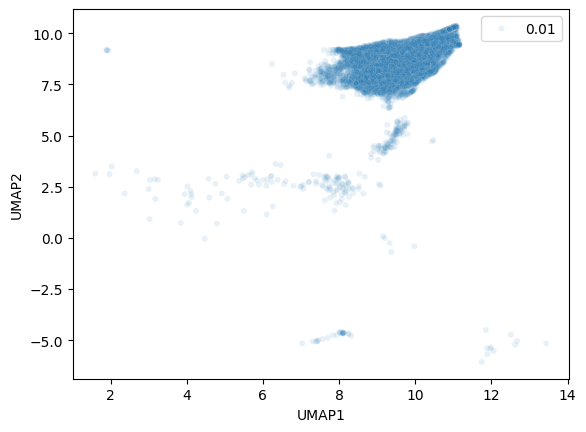

In [43]:
sns.scatterplot(data = Myeloid_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

Number of cells filtered: 280


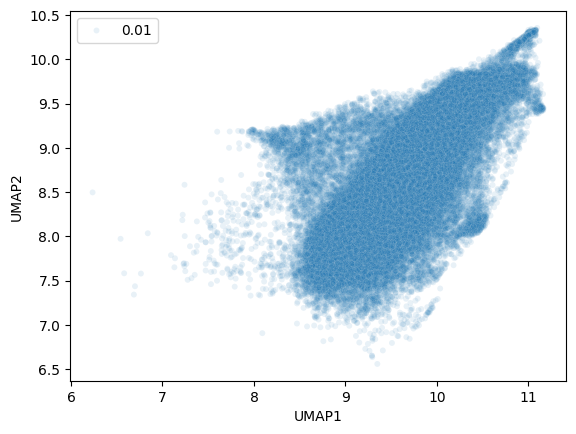

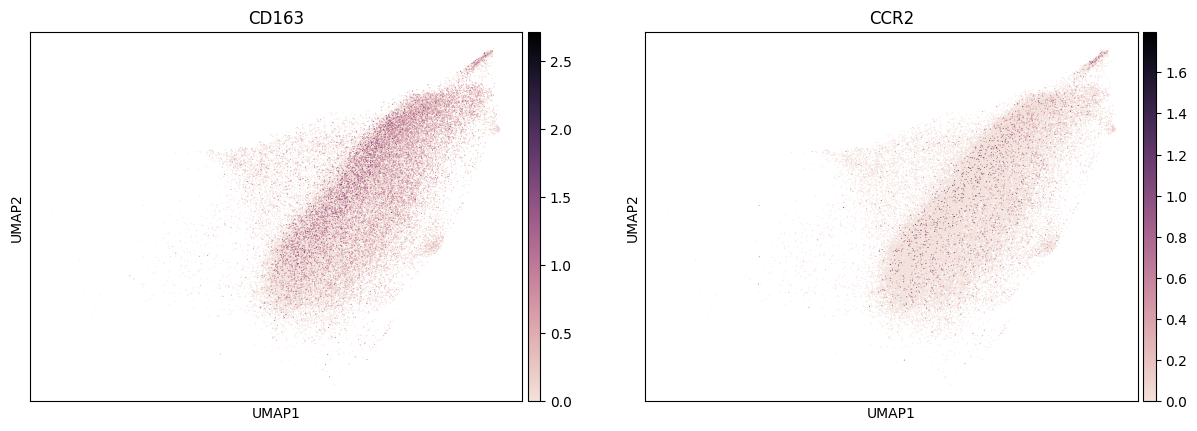

CPU times: user 18 s, sys: 27.2 s, total: 45.3 s
Wall time: 44.9 s


In [44]:
%%time
filt_Myeloid_gene_matrix = ( Myeloid_gene_matrix[(Myeloid_gene_matrix.obs.UMAP2 > 6.5) &
                         (Myeloid_gene_matrix.obs.UMAP1 > 6)] ).copy()
sns.scatterplot(data = filt_Myeloid_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered: {Myeloid_gene_matrix.shape[0] - filt_Myeloid_gene_matrix.shape[0]}")
sc.pl.umap(filt_Myeloid_gene_matrix, color = ["CD163", "CCR2"], cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

In [45]:
filt_Myeloid_metadata = filt_Myeloid_gene_matrix.obs
filt_Myeloid_metadata['cell_type'] = "Myeloid"

In [46]:
del filt_Myeloid_gene_matrix
gc.collect()

21933

### Lymphoid-Mast

In [47]:
%%time
Lymphoid_Mast_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Lymphoid-Mast_gene_imputed.h5ad")
Lymphoid_Mast_gene_matrix

CPU times: user 348 ms, sys: 13.1 s, total: 13.5 s
Wall time: 14.9 s


AnnData object with n_obs × n_vars = 20638 × 60281
    obs: 'barcode', 'sample_id', 'leiden', 'donor_id', 'study', 'age_status', 'age', 'sex', 'region', 'disease_binary', 'technology', 'fragment_file', 'full_path', 'file', 'nfrag', 'tsse', 'cell_type', 'UMAP1', 'UMAP2', 'redo_leiden'
    var: 'n_counts'
    uns: 'log1p', 'neighbors', 'pca', 'redo_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

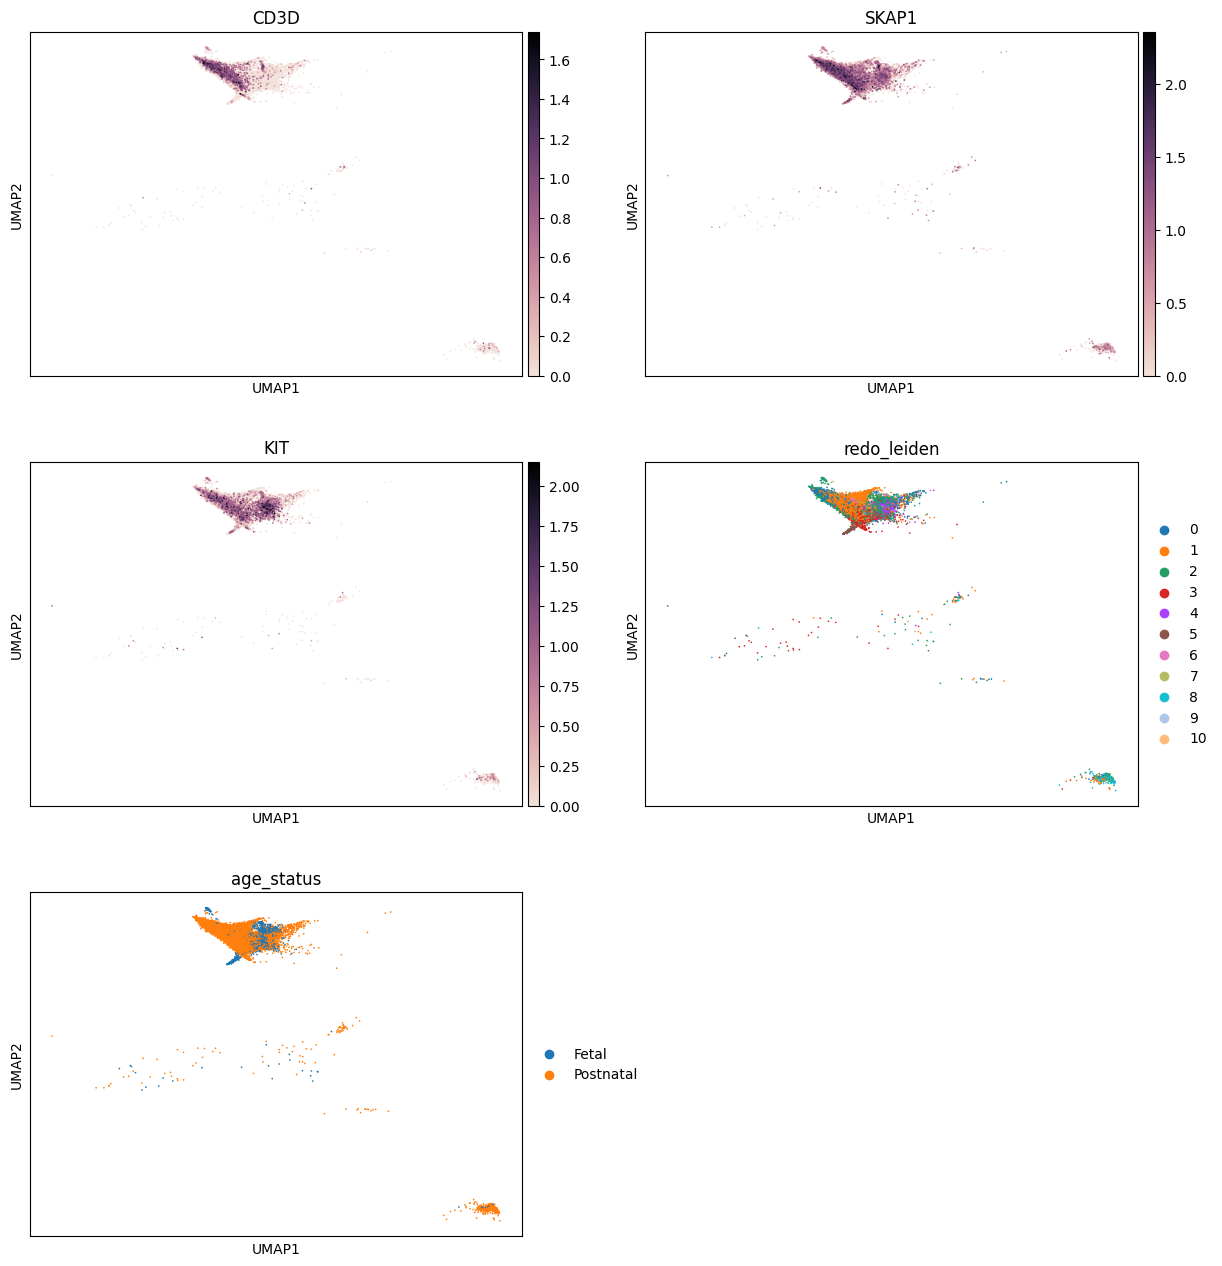

In [48]:
sc.pl.umap(Lymphoid_Mast_gene_matrix, color = ["CD3D", "SKAP1", "KIT", 
                                               "redo_leiden", "age_status"], ncols = 2,
          cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

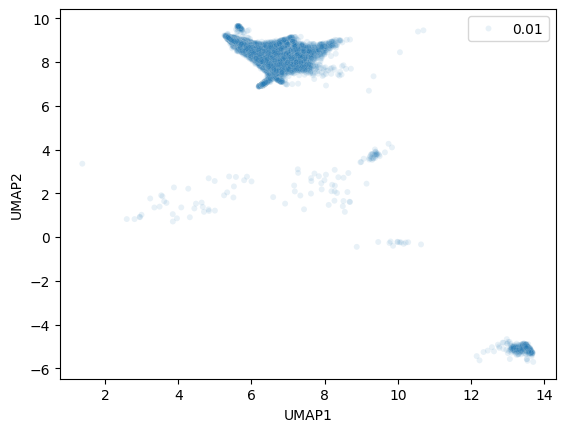

In [49]:
sns.scatterplot(data = Lymphoid_Mast_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

Number of cells filtered: 533
CPU times: user 5.68 s, sys: 9 s, total: 14.7 s
Wall time: 14.7 s


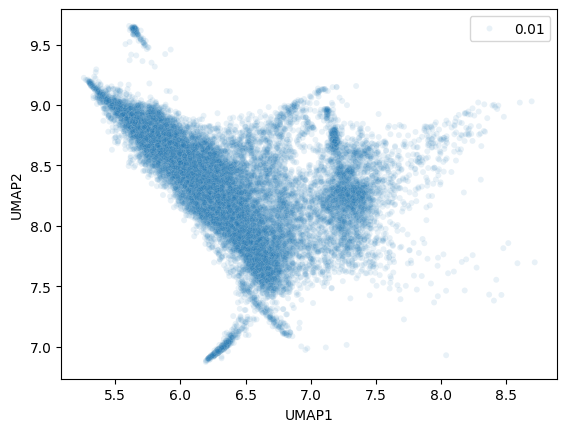

In [50]:
%%time
filt_Lymphoid_Mast_gene_matrix = ( Lymphoid_Mast_gene_matrix[(Lymphoid_Mast_gene_matrix.obs.UMAP2 > 6) &
                         (Lymphoid_Mast_gene_matrix.obs.UMAP1 < 9) ] ).copy()
sns.scatterplot(data = filt_Lymphoid_Mast_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered: {Lymphoid_Mast_gene_matrix.shape[0] - filt_Lymphoid_Mast_gene_matrix.shape[0]}")

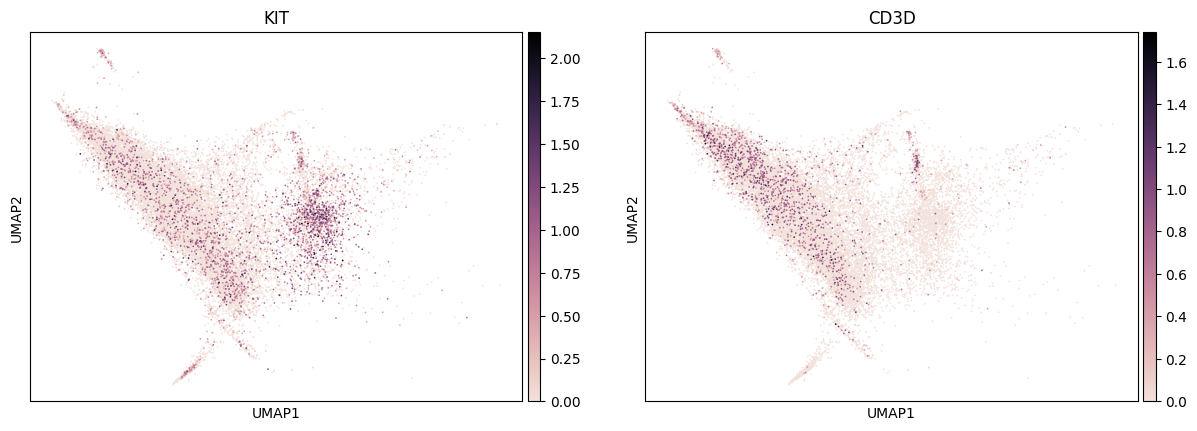

In [51]:
sc.pl.umap(filt_Lymphoid_Mast_gene_matrix, color = ["KIT", "CD3D"], cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

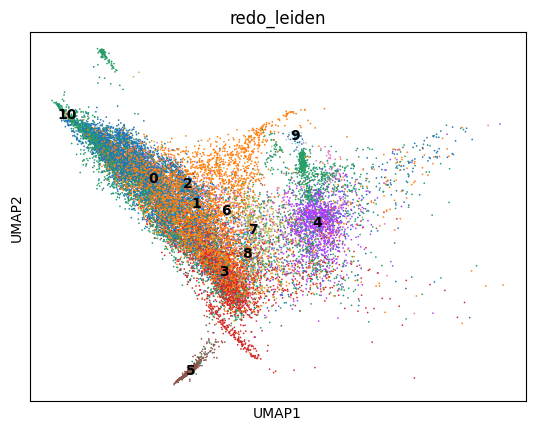

In [52]:
sc.pl.umap(filt_Lymphoid_Mast_gene_matrix, color = ["redo_leiden"], legend_loc = "on data", 
           cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

Leiden cluster 4 are the mast cells, the others are likely Lymphoid cells

In [53]:
%%time
filt_Lymphoid_gene_matrix = filt_Lymphoid_Mast_gene_matrix[filt_Lymphoid_Mast_gene_matrix.obs['redo_leiden'] != "4"].copy()
filt_Mast_gene_matrix = filt_Lymphoid_Mast_gene_matrix[filt_Lymphoid_Mast_gene_matrix.obs['redo_leiden'] == "4"].copy()

print(filt_Lymphoid_gene_matrix.shape[0])
print(filt_Mast_gene_matrix.shape[0])

18802
1303
CPU times: user 5.2 s, sys: 9.24 s, total: 14.4 s
Wall time: 14.4 s


In [54]:
filt_Lymphoid_metadata = filt_Lymphoid_gene_matrix.obs
filt_Lymphoid_metadata['cell_type'] = "Lymphoid"

filt_Mast_metadata = filt_Mast_gene_matrix.obs
filt_Mast_metadata['cell_type'] = "Mast"

In [55]:
del filt_Lymphoid_Mast_gene_matrix
del filt_Lymphoid_gene_matrix
del filt_Mast_gene_matrix
gc.collect()

34091

### Pericyte

In [56]:
%%time
Pericyte_gene_matrix = sc.read_h5ad("pre_indiv_cell_type_adata/Pericyte-vSMC_gene_imputed.h5ad")
Pericyte_gene_matrix

CPU times: user 645 ms, sys: 36.8 s, total: 37.4 s
Wall time: 40.5 s


AnnData object with n_obs × n_vars = 58434 × 60378
    obs: 'barcode', 'sample_id', 'leiden', 'donor_id', 'study', 'age_status', 'age', 'sex', 'region', 'disease_binary', 'technology', 'fragment_file', 'full_path', 'file', 'nfrag', 'tsse', 'cell_type', 'UMAP1', 'UMAP2', 'redo_leiden'
    var: 'n_counts'
    uns: 'log1p', 'neighbors', 'pca', 'redo_leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

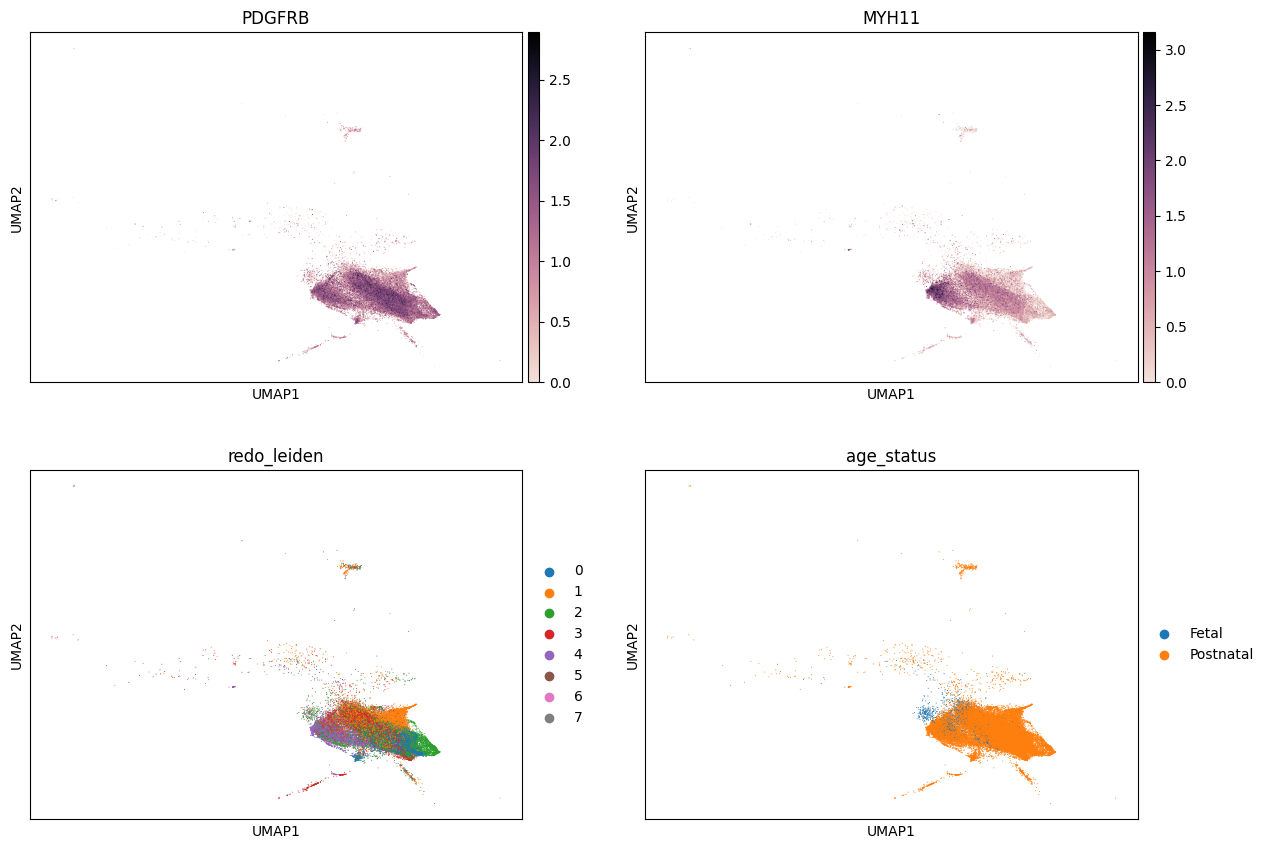

In [57]:
sc.pl.umap(Pericyte_gene_matrix, color = ["PDGFRB", "MYH11", "redo_leiden", "age_status"], ncols = 2,
          cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

<Axes: xlabel='UMAP1', ylabel='UMAP2'>

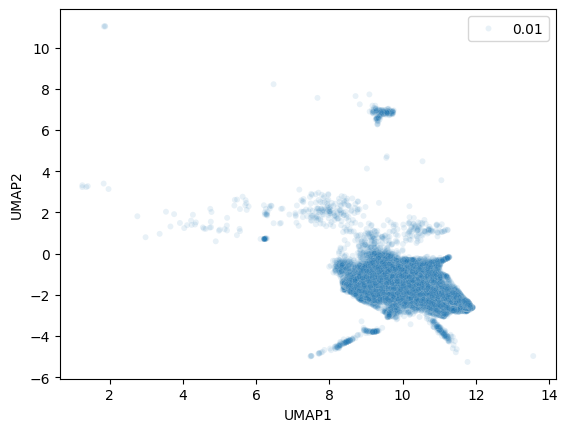

In [58]:
sns.scatterplot(data = Pericyte_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)

Number of cells filtered: 969


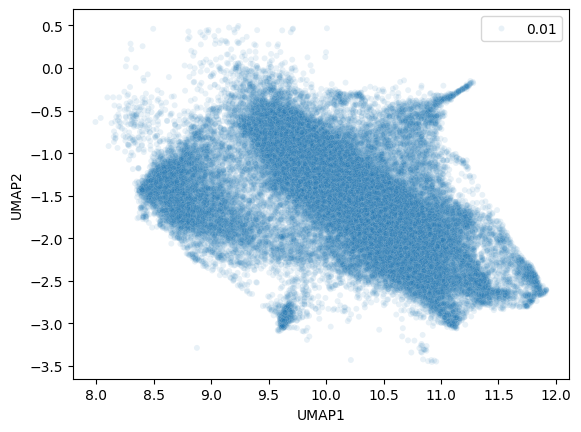

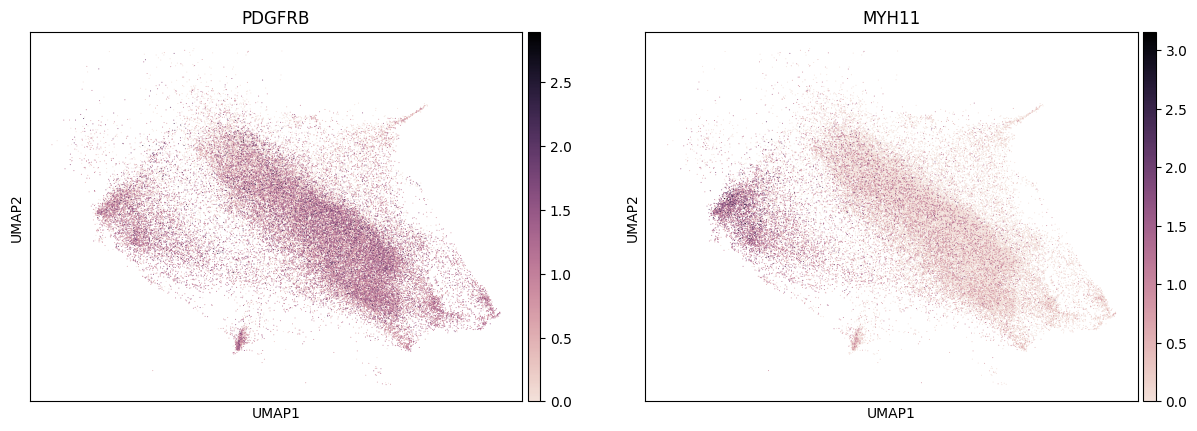

CPU times: user 14.7 s, sys: 2min 21s, total: 2min 36s
Wall time: 2min 36s


In [59]:
%%time
filt_Pericyte_gene_matrix = ( Pericyte_gene_matrix[(Pericyte_gene_matrix.obs.UMAP2 > -3.5) & 
                             (Pericyte_gene_matrix.obs.UMAP2 < 0.5)] ).copy()
sns.scatterplot(data = filt_Pericyte_gene_matrix.obs, x = 'UMAP1', y = 'UMAP2', size = 0.01, alpha = 0.1)
print(f"Number of cells filtered: {Pericyte_gene_matrix.shape[0] - filt_Pericyte_gene_matrix.shape[0]}")

sc.pl.umap(filt_Pericyte_gene_matrix, color = ["PDGFRB", "MYH11"], cmap=sns.cubehelix_palette(dark=0, light=.9, as_cmap=True))

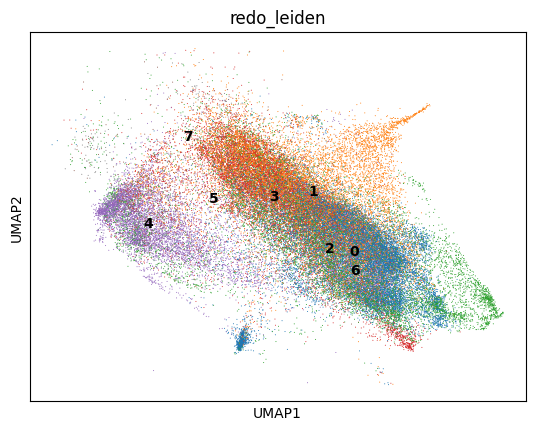

In [60]:
sc.pl.umap(filt_Pericyte_gene_matrix, color = ["redo_leiden"], legend_loc = "on data")

#### Leiden cluster 4 are vSMC, other leiden clusters are pericytes

In [61]:
%%time
further_filt_Pericyte_gene_matrix = filt_Pericyte_gene_matrix[filt_Pericyte_gene_matrix.obs['redo_leiden'] != "4"].copy()

CPU times: user 11.5 s, sys: 2min 21s, total: 2min 32s
Wall time: 2min 33s


In [62]:
%%time
further_filt_vSMC_gene_matrix = filt_Pericyte_gene_matrix[filt_Pericyte_gene_matrix.obs['redo_leiden'] == "4"].copy()

CPU times: user 1.53 s, sys: 5.66 s, total: 7.19 s
Wall time: 7.19 s


In [63]:
filt_Pericyte_metadata = further_filt_Pericyte_gene_matrix.obs
filt_Pericyte_metadata['cell_type'] = "Pericyte"

In [64]:
filt_vSMC_metadata = further_filt_vSMC_gene_matrix.obs
filt_vSMC_metadata['cell_type'] = "vSMC"

In [65]:
del filt_Pericyte_gene_matrix
del further_filt_Pericyte_gene_matrix
del further_filt_vSMC_gene_matrix
gc.collect()

28148

### Combine the metadata together

In [66]:
combined_metadata = pd.concat([filt_Adipo_metadata, filt_CM_metadata,
                              filt_Endothelial_metadata, filt_Epicardial_metadata, filt_Fibroblast_metadata, 
                              filt_Myeloid_metadata, filt_Lymphoid_metadata, 
                               filt_Mast_metadata, filt_Neuronal_metadata, 
                              filt_vSMC_metadata, filt_Pericyte_metadata])

In [67]:
combined_metadata.to_csv("05_high_quality_cell_metadata.csv")

In [68]:
combined_metadata.columns

Index(['barcode', 'sample_id', 'leiden', 'donor_id', 'study', 'age_status',
       'age', 'sex', 'region', 'disease_binary', 'technology', 'fragment_file',
       'full_path', 'file', 'nfrag', 'tsse', 'cell_type', 'UMAP1', 'UMAP2',
       'redo_leiden'],
      dtype='object')

In [69]:
Counter(combined_metadata.study)

Counter({'ENCODE v4 (Snyder)': 495343,
         'Penn': 118138,
         'Kuppe 2022': 34370,
         'Kanemaru 2023': 28983,
         'Ameen 2022': 14122})

In [70]:
Counter(combined_metadata.cell_type)

Counter({'Cardiomyocyte': 291398,
         'Fibroblast': 143128,
         'Endothelial': 115270,
         'Myeloid': 56991,
         'Pericyte': 51561,
         'Lymphoid': 18802,
         'vSMC': 5904,
         'Neuronal': 3365,
         'Epicardial': 2299,
         'Mast': 1303,
         'Adipocyte': 935})

In [71]:
Counter(combined_metadata.technology)

Counter({'10X_Multiome': 495884, '10X_ATAC': 195072})

### This just saved the metadata (due to RAM issues) with performing the filtering in this step. 
### Run Step 05D (`05D_reannotate_cell_types.py`) to actually reannotate the adata object